<a href="https://colab.research.google.com/github/BrittonWinterrose/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
data = "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
head = ["A1",'A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']

In [2]:
df = pd.read_csv(data, na_values='?', names=head)
""" 
Should have 690 w/ this many NaN
    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13
    """;
df.describe(include='all')
# 690 instances, NaN's as expected. 


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,678,678.000000,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677.000000,690.000000,690
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,NaN,NaN,383
mean,NaN,31.568171,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,184.014771,1017.385507,NaN
std,NaN,11.957862,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.806768,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,75.000000,0.000000,NaN
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.230000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,276.000000,395.500000,NaN


In [3]:
# Check data types
# df.dtypes
# A11 = int, should be float. A15 = int, should be float.
df.A11 = df.A11.astype(float)
df.A15 = df.A15.astype(float)
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

**Explore the data: ** you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

**For the 6 continuous features, how are they different when split between the two class labels**? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

**For the categorical features, explore by creating "cross tabs" between them and the class label,** and apply the Chi-squared test to them. There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end. This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


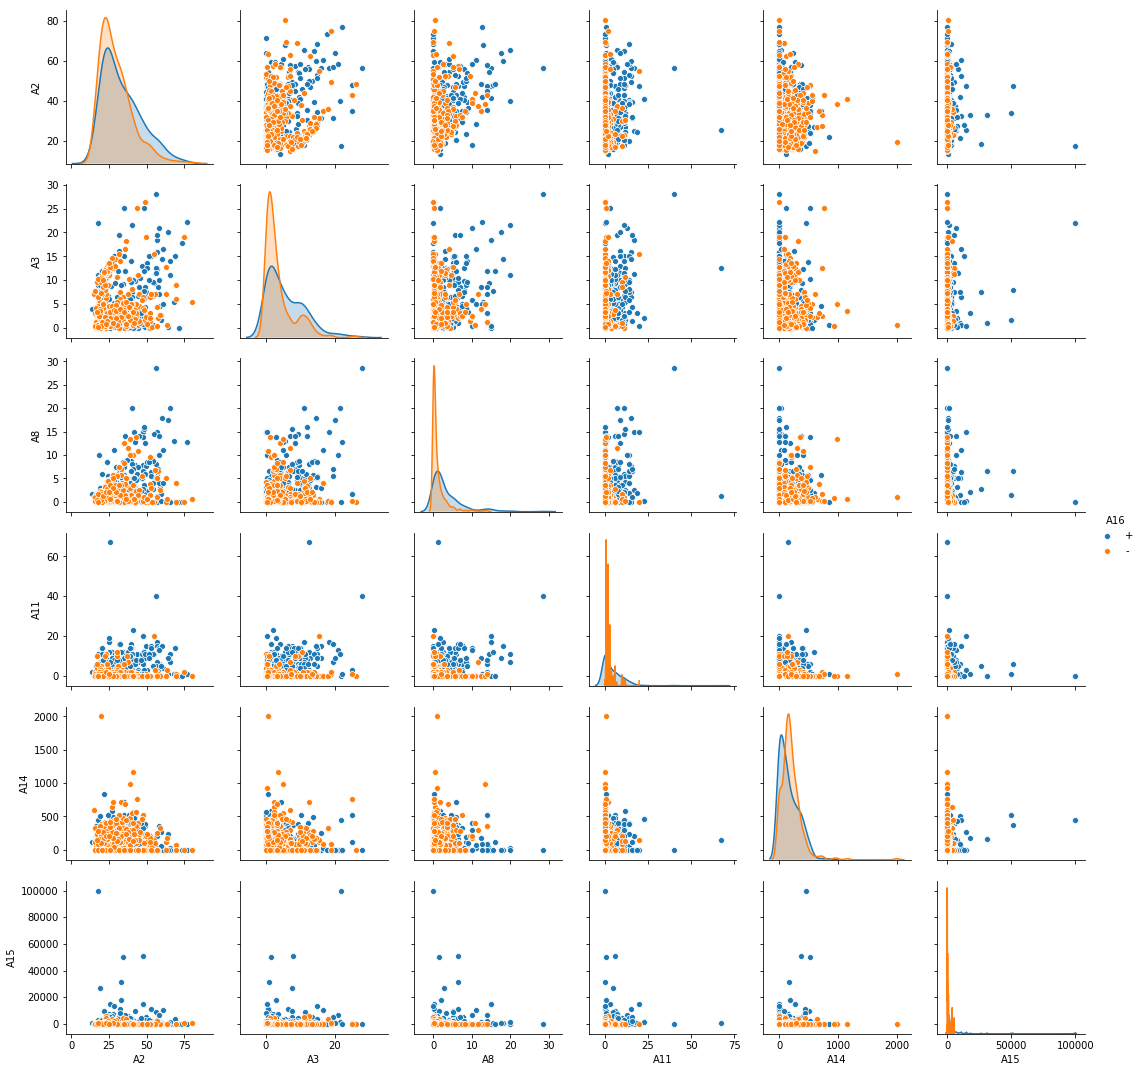

In [4]:
#!pip install seaborn --upgrade
import seaborn as sns
g = sns.pairplot(df, hue = "A16")
#plt.hist([x, y], color=['r','b'], alpha=0.5)

In [8]:
# Change +/- to 1/0
df.A16.replace("+", 1, inplace=True)
df.A16.replace('-', 0, inplace=True)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,1


In [9]:
# Here I loop through all continuous variables and t-test them split +/-. 
# A11 is extremely different as indicated by it's t-stat=10.63 and p=4.3x10-23
# A15 is the least different between classs labels, but is still significant. 

import scipy.stats
t_test_scores= []
continous_columns = df.select_dtypes(include=['float64'])

for column_name in continous_columns:
  statistic, pvalue = stats.ttest_ind(df[column_name].loc[df['A16'] == 1], 
                                      df[column_name].loc[df['A16'] == 0], 
                                      nan_policy='omit', equal_var = False)
  lst = [column_name, statistic, pvalue]
  t_test_scores.append(lst)
  
t_tests = pd.DataFrame(t_test_scores)
t_tests = t_tests.sort_values(by=[2])
t_tests.head(6)

,0,1,2
3,A11,10.638419,4.310254e-23
2,A8,8.380060,7.425349e-16
1,A3,5.392531,1.015881e-07
0,A2,4.224491,2.767385e-05
5,A15,4.196600,3.543380e-05
4,A14,-2.669649,7.777825e-03


In [13]:
# Here I'm processing my categorical data into Crosstabs.
cat_col = df.select_dtypes(include=['object'])
cat_col["A16"] = df.A16
cat_col.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
0,b,u,g,w,v,t,t,f,g,1
1,a,u,g,q,h,t,t,f,g,1
2,a,u,g,q,h,t,f,f,g,1
3,b,u,g,w,v,t,t,t,g,1
4,b,u,g,w,v,t,f,f,s,1


In [72]:
from scipy.stats import chisquare 
# Crosstab all the categorical data. 
# Inital Thoughts:
# - A9 looks like a strong candidate. 
# - A12 looks like the least strong corrilation
chi_table = []
for col in cat_col:
  crosstab = pd.crosstab(cat_col.A16, cat_col[col])
  np_array = np.array(crosstab).T
  statistic, pvalue = chisquare(np_array, axis=None)
  chisq = chisquare(np_array, axis=None)
  chi = [col, statistic, pvalue, np_array.T]
  chi_table.append(chi)
  print ("Crosstab of ",col,"and A16","\n",crosstab,"\n",chisq,"\n",np_array,"\n","\n")
  

Crosstab of  A1 and A16 
 A1     a    b
A16          
0    112  262
1     98  206 
 Power_divergenceResult(statistic=108.00589970501476, pvalue=2.9474557158762434e-23) 
 [[112  98]
 [262 206]] 
 

Crosstab of  A4 and A16 
 A4   l    u    y
A16             
0    0  263  118
1    2  256   45 
 Power_divergenceResult(statistic=637.561403508772, pvalue=1.545055409454076e-135) 
 [[  0   2]
 [263 256]
 [118  45]] 
 

Crosstab of  A5 and A16 
 A5     g  gg    p
A16              
0    263   0  118
1    256   2   45 
 Power_divergenceResult(statistic=637.561403508772, pvalue=1.545055409454076e-135) 
 [[263 256]
 [  0   2]
 [118  45]] 
 

Crosstab of  A6 and A16 
 A6   aa   c  cc   d   e  ff   i  j   k   m   q  r   w   x
A16                                                      
0    35  75  12  23  11  46  45  7  37  22  27  1  31   6
1    19  62  29   7  14   7  14  3  14  16  51  2  33  32 
 Power_divergenceResult(statistic=393.32011747430255, pvalue=1.1436746143425653e-66) 
 [[35 19]
 [75 62]

In [65]:
# Chi Squared Analysis
# Sorted low to high
chi_df = pd.DataFrame(chi_table, columns = ["TestID", "Chi_Statistic", "pValue",'Crosstab'])
chi_df = chi_df.sort_values(by=["Chi_Statistic"])
chi_df.head(10)

,TestID,Chi_Statistic,pValue,Crosstab
7,A12,14.382609,2.428020e-03,"[[213, 170], [161, 146]]"
0,A1,108.005900,2.947456e-23,"[[112, 262], [98, 206]]"
6,A10,173.130435,2.684217e-37,"[[297, 86], [98, 209]]"
5,A9,357.826087,3.013264e-77,"[[306, 77], [23, 284]]"
3,A6,393.320117,1.143675e-66,"[[35, 75, 12, 23, 11, 46, 45, 7, 37, 22, 27, 1..."
1,A4,637.561404,1.545055e-135,"[[0, 263, 118], [2, 256, 45]]"
2,A5,637.561404,1.545055e-135,"[[263, 0, 118], [256, 2, 45]]"
9,A16,706.742029,7.246062e-153,"[[383, 0], [0, 307]]"
8,A13,1037.269565,5.124925e-222,"[[338, 3, 42], [287, 5, 15]]"
4,A7,1855.942731,0.000000e+00,"[[34, 4, 49, 51, 5, 2, 1, 230, 2], [25, 2, 8, ..."


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

# My analysis: 

## T-Tests

I ran 2 sided welsh's t-tests across all the continous variables and selected A11 as my extremely different and A15 as the lesser different feature across the continous variables. I did _not_ select A14 as it was much less significant, but in the context of credit score information I would not be suprised if all of this information is significant. 

**A11 is extremely different** as indicated.  ***t-stat=10.63 and p=4.3e-23***

**A15 was less different than A11**, and the least different with a significant p-value. 	***t-stat=4.19	p=3.54e-05***

**A14	was the least significant** but was corrilated with a negative A16 value ***t-stat= -2.66 	p=7.77e-03***

Below are my graphs of A11, A15, and A14 colored by A16

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


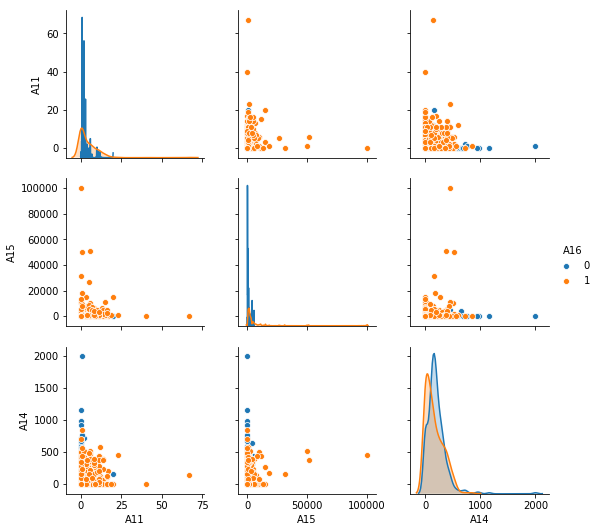

In [71]:
# Note the variance between the plots of A14 from A11 & A15
g = sns.pairplot(df,vars=["A11","A15","A14"], hue="A16")



##Chi-Squared
I analyzed all of the categorical variables using a crosstab for each one along with whether it was approved or rejected. 

I chose A12 as the least extreme Chi-Squared test and A9 as a very extreme Chi-Squared test.

`A12	ChiStat=14.38	p=2.42e-03`

`crosstab array rejectedx F,T :[213, 170],  acceptedx T,F: [161, 146]`

You could possibly answer false and still get approved on this one. 
A12 had the lowest relative  variance between the approved/rejected, yet was still significant. 

A9 was the very extreme one I chose to accept due to the clear seperation of acceptances and rejections for each. 
You better hope you're answering true or you're likely getting rejected. 

`ChiStat=357.82	p=3.01e-77`	
`rejected x F,T [306, 77]; accepted x F,T [23, 284]`

Overall, all of these seem significant. Which seems to be expected considering that the credit card companies use it as some sort of screening criteria. 

# Most Difficult Part of the Sprint Challenge?

Managing my time effectively. :) not digging in too deep.